In [1]:
import numpy as np
import pandas as pd

#import os

In [2]:
# import some supporting libraries

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
# Preview file contents

df = pd.read_csv('fake_job_postings.csv')
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
# Analyzing the structure of the dataset

df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

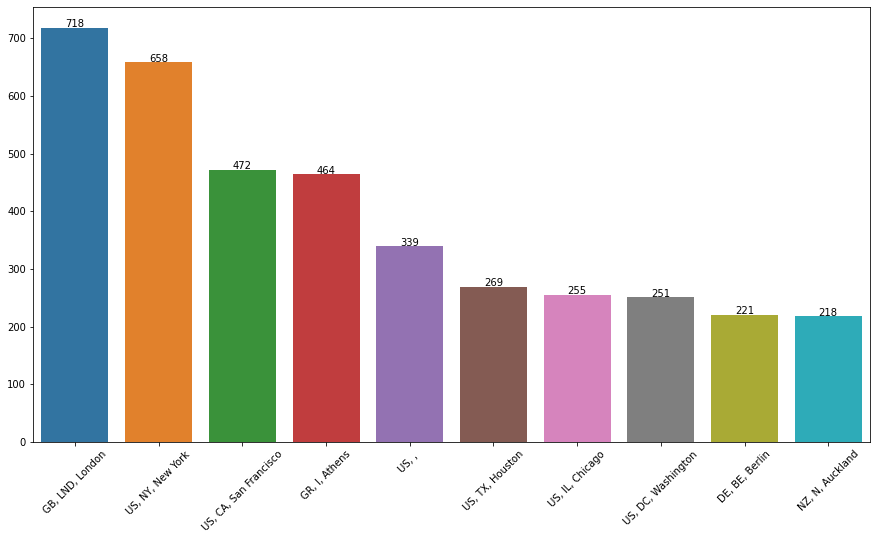

In [7]:
# Visualization of the distrubution based on location of job

labels = df.location.value_counts().index[:10]
values = df.location.value_counts().values[:10]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i],ha="center")

In [8]:
# The graph indicates most jobs in the dataset come from the cities: 
# London, New York, and San Francisco

In [9]:
# Breakdown of job listings by corporate department

labels = df['department'].value_counts().index[:10]
values = df['department'].value_counts().values[:10]
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                'rgb(175, 49, 35)', 'rgb(36, 73, 147)']

fig = make_subplots(1, specs=[[{'type':'domain'}]],subplot_titles=['Department'])
fig.add_trace(go.Pie(labels=labels, values=values, pull=[0.1,0,0,0,0,0,0,0,0],hole=.15,name="Department Top 10", marker_colors=irises_colors), 1, 1)
fig.update_layout(title_text='Department Top 10')
fig.show()

In [10]:
# As shown in the pie chart, job postings from the dataset are predominantly related to 
# Sales, Engineering, Marketing, and Operations

In [11]:
# Reconstructing job postings

df.fillna('',inplace=True)

In [12]:
df['text'] = df['title'].str.cat(df[['location', 'department', 'salary_range',
                                    'company_profile', 'description', 'requirements',
                                    'benefits', 'employment_type', 'required_education',
                                    'industry', 'function']].astype(str), sep=' ')

In [13]:
df.drop(columns=['title', 'job_id', 'has_questions', 'required_experience',
                'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements',
                'benefits', 'telecommuting', 'has_company_logo', 'employment_type', 'required_education', 'industry',
                'function'],inplace=True)

In [14]:
df.text[1]

"Customer Service - Cloud Video Production NZ, , Auckland Success  90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest i

In [15]:
df.text = df.text.apply(lambda x: x.lower())

In [16]:
df['text']=df.text.str.replace(r'\W', ' ', regex=True)
df['text']=df.text.str.replace(r'\b\d+', ' ', regex=True)
df['text']=df.text.str.replace(r'\S{20,}', ' ', regex=True)
df['text']=df.text.str.replace(r'\s{2,}', ' ', regex=True)

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matthewrabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

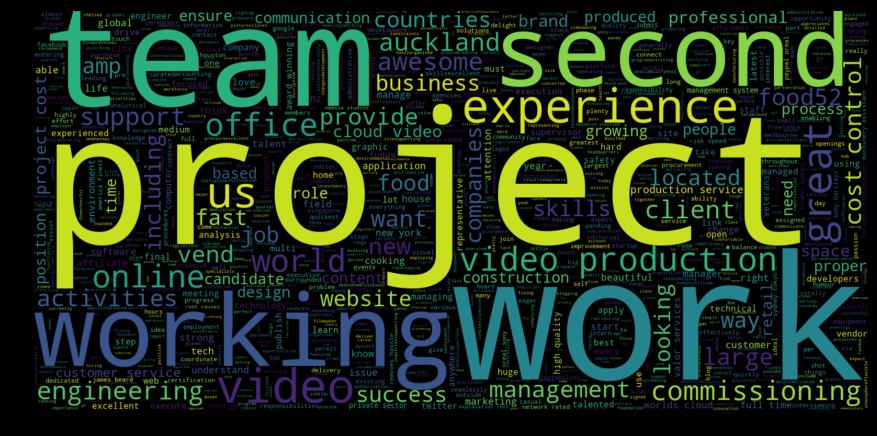

In [19]:
wordcloud = WordCloud(
    width = 1600,
    height = 768,
    max_words = 2500,
    background_color = 'black').generate(str(df.text.values))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

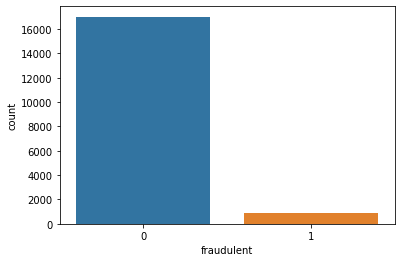

In [20]:
# Visualization of legitimate vs. fraudulent job listings
sns.countplot(x="fraudulent", data=df)

In [21]:
# Fraudulent jobs count
df[df.text.duplicated()].count()

fraudulent    447
text          447
dtype: int64

In [22]:
# Legitimate jobs count
df = df.drop_duplicates()
print(len(df))
df.reset_index(drop=True, inplace=True)

17433


In [23]:
df['text'].apply(lambda x: len(str(x).split())).mean()

252.7918315837779

In [24]:
from keras.preprocessing.text import Tokenizer

num_max = 1000000
max_len = 400
## Process of enumerating words
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(df.text)

In [25]:
# Still working on understanding the application of K Neighbors to obtain an
# optimal number of classifications
# ...

In [26]:
# FROM HERE ON, THERE ARE UPDATES FOR THE SECOND PROJECT PRESENTATION

In [27]:
cnn_texts_seq = tok.texts_to_sequences(df.text)

In [28]:
from keras.preprocessing import sequence, text

cnn_texts_mat = sequence.pad_sequences(cnn_texts_seq,maxlen=max_len,padding='post')
cnn_texts_mat

array([[   19,  1244,     5, ...,     0,     0,     0],
       [ 3848,  1834,  2570, ...,   251,    10,    18],
       [ 4749,  2676,   533, ...,     0,     0,     0],
       ...,
       [   53,   315,   360, ...,     0,     0,     0],
       [ 1203,   535, 13947, ...,     0,     0,     0],
       [  935,   458,  4659, ...,   111,    26,    64]], dtype=int32)

In [29]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(cnn_texts_mat)
X

array([[1.92853699e-04, 1.33548214e-02, 4.28398539e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.12171211e-02, 1.96937953e-02, 2.75138962e-02, ...,
        2.69547568e-03, 1.07250107e-04, 1.93298969e-04],
       [5.08705202e-02, 2.87402632e-02, 5.69770057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.57132908e-04, 3.37362342e-03, 3.84487689e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28783415e-02, 5.73730862e-03, 1.49361151e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00069642e-02, 4.91001880e-03, 4.98870099e-02, ...,
        1.19202311e-03, 2.78850279e-04, 6.87285223e-04]])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,df.fraudulent,test_size=0.1, random_state=122)

In [36]:
(X_train.shape,X_test.shape)

((15689, 400), (1744, 400))

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [34]:
from sklearn.model_selection import cross_val_score

k_neighbors = list(range(1,9,2))
scores_ = []

for item in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=item)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    scores_.append(scores.mean())

KeyboardInterrupt: 

In [36]:
scores.max()

0.950939789741956

<Figure size 432x288 with 0 Axes>

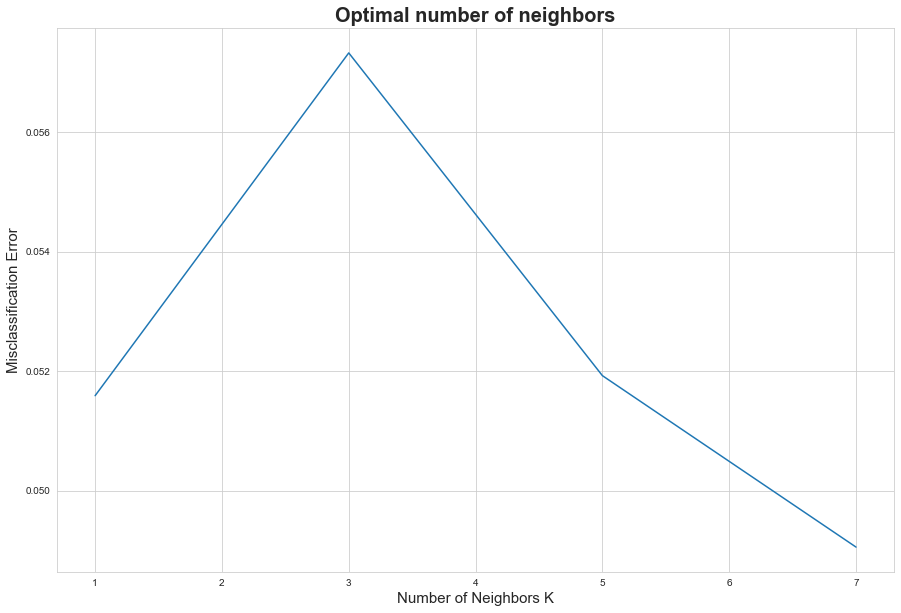

In [40]:
MSE = [1 - x for x in scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_neighbors, MSE[:len(k_neighbors)])

plt.show()